# Week 2 Text Pre-processing

<author> &copy; Professor Yuefeng Li </author>


## From Words to Terms and Text Statistics

### Question 1. 
Please open a text or an XML file (e.g., 6146.xml) and represent it as a list of paragraphs or sentences, text. You may remove any non-relevant information (e.g., \<p\>, \</p\>, \n). After that, you need to find all terms and their frequencies (the number of occurrences in the file) if their length > 2, represent them using a dictionary, doc; and print the number of total terms (e.g., 137).  Then print the top-10 terms in doc in a descending order.

In [1]:
# open and read a xml file line by line
myfile=open('6146.xml')
file_=myfile.readlines()

In [2]:
# doc is initialized as a dict
doc={}

In [3]:
# Remove several special characters using list comprehension

text = [line.replace("<p>", "").replace("</p>", "").replace("\n", "") for line in file_ if line.startswith('<p>')]
print(text)

['Argentine bonds were slightly higher in a small technical bounce Wednesday amid low volume.', 'A trader at a large foreign bank said there was a slight technical bounce at the opening, and he did not expect prices to change much during the session as no market-moving news is expected.', "The 5.5 percent dollar-denominated Bocon Previsional 2 due 2001 rose $0.15 to 115.15. Argentina's FRB due 2005 rose 1/8 to 77-3/8.", "&quot;There is general uncertainty,&quot; said the trader, pointing to all the events the market is waiting for, including the passage of the government's new economic measures through Congress, which is now not expected until early October.", "In addition, traders are awaiting a meeting Friday between Economy Minister Roque Fernandez and an International Monetary Fund delegation on Argentina's fiscal deficit.", '-- Axel Bugge, Buenos Aires Newsroom, 541 318-0668']


In [4]:
# count the number of words
word_count=0
for line in text:
    for term in line.split():
        word_count += 1 
        term = term.lower()
        if len(term) > 2:
            try:
                doc[term] += 1
            except KeyError:
                doc[term] = 1
print(word_count)

137


### Sort the dictonary and plt the frequency distribution 

[('the', 8), ('technical', 2), ('bounce', 2), ('said', 2), ('and', 2), ('not', 2), ('due', 2), ('rose', 2), ("argentina's", 2), ('argentine', 1)]


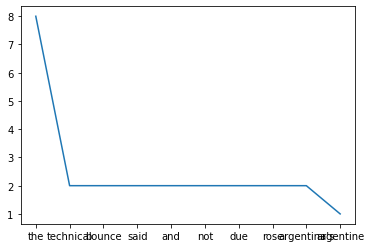

In [5]:
import matplotlib.pyplot as plt
myList = doc.items()
myList = sorted(myList, key=lambda x:x[1], reverse=True) #sorted by value
myLList = list(myList)
myList = myLList[:10]
print(myList)
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()
myfile.close()

In [ ]:
#doc1=list(doc.items())
#doc1.sort(reverse=True) #sort in reverse order by the 'key'
#ddoc=dict(doc1)

### Question 3 (n-grams)
Typically, n-grams are formed from overlapping sequences of words., i.e. move n-word “window” one word at a time in a document. For example, bigrams are 2 words sequences, and trigrams are 3 words sequences. 

The definition of Tropical fish is described in the following document: 

<em> Tropical fish are generally those fish found in aquatic tropical environments around the world, including both freshwater and saltwater species. Fishkeepers often keep tropical fish in freshwater and saltwater aquariums. </em>

Please design a python program to print all bigrams and trigrams of the above document that contain at least one of the highlighted key words (‘fish’, ‘tropical’, ‘freshwater’, ‘saltwater’, ‘aquariums’). 

In [15]:
import string

def is_highlight(gram, keywords):
    x = False
    for y in keywords:
        if y in gram:
            x = True
    return x

line ="Tropical fish are generally those fish found in aquatic tropical environments around the world, \
including both freshwater and saltwater species. Fishkeepers often keep tropical fish in freshwater and \
saltwater aquariums."

line = line.translate(str.maketrans('','', string.digits)).translate(str.maketrans(string.punctuation, \
                                                                                   ' '*len(string.punctuation)))
words=line.split()
stems = words
bigrams = [stems[i]+' '+stems[i+1] for i in range(len(stems)-1)]
trigrams = [stems[i]+' '+stems[i+1]+' '+stems[i+2] for i in range(len(stems)-2)]

keywords = ['fish', 'tropical', 'freshwater', 'saltwater', 'aquariums']

bigrams1 = [gram for gram in bigrams if is_highlight(gram, keywords)]
trigrams1 = [gram for gram in trigrams if is_highlight(gram, keywords)]
print(bigrams1)
print(trigrams1)

['Tropical fish', 'fish are', 'those fish', 'fish found', 'aquatic tropical', 'tropical environments', 'both freshwater', 'freshwater and', 'and saltwater', 'saltwater species', 'keep tropical', 'tropical fish', 'fish in', 'in freshwater', 'freshwater and', 'and saltwater', 'saltwater aquariums']
['Tropical fish are', 'fish are generally', 'generally those fish', 'those fish found', 'fish found in', 'in aquatic tropical', 'aquatic tropical environments', 'tropical environments around', 'including both freshwater', 'both freshwater and', 'freshwater and saltwater', 'and saltwater species', 'saltwater species Fishkeepers', 'often keep tropical', 'keep tropical fish', 'tropical fish in', 'fish in freshwater', 'in freshwater and', 'freshwater and saltwater', 'and saltwater aquariums']


### Question 4 (Markov chain - optional) 
(3) Design a function to forecast the state after k days. For example, you may assume the start state is ‘Sleep’. You can also the “numpy.random.choice” to generate a random sample from the set of transitions for each day.

In [16]:
import numpy as np
import random as rm

In [17]:
# The statespace
states = ["Sleep","Icecream","Run"]
# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]
# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

In [18]:
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [19]:
# A function that implements the Markov model to forecast the state/mood.
# You will use the numpy.random.choice to generate a random sample from the set of transitions possible.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)

Start state: Sleep
Possible states: ['Sleep', 'Icecream', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.13999999999999999


In [20]:
# the above function get a random set of transitions possible along with the probability of it happening, 
# starting from state: Sleep.

# Extend the program further to maybe iterate it for a couple of hundred times with the same starting state, 
# you can then see the expected probability of ending at any particular state along with its probability.

def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

The probability of starting at state:'Sleep' and ending at state:'Run'= 61.78%


### Question 5 (optional)
Viterbi algorithm
https://en.wikipedia.org/wiki/Viterbi_algorithm

The observations (normal, cold, dizzy) along with a hidden state (healthy, fever) form a hidden Markov model (HMM).

In [7]:
obs = ("normal", "cold", "dizzy")
states = ("Healthy", "Fever")
start_pi = {"Healthy": 0.6, "Fever": 0.4}
trans_A = {
    "Healthy": {"Healthy": 0.7, "Fever": 0.3},
    "Fever": {"Healthy": 0.4, "Fever": 0.6},
}
emit_B = {
    "Healthy": {"normal": 0.5, "cold": 0.4, "dizzy": 0.1},
    "Fever": {"normal": 0.1, "cold": 0.3, "dizzy": 0.6},
}

In [8]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0] [st] = {"prob": start_p[st] * emit_p[st] [obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1] [states[0]] ["prob"] * trans_p[states[0]] [st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1] [prev_st] ["prob"] * trans_p[prev_st] [st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

            max_prob = max_tr_prob * emit_p[st] [obs[t]]
            V[t] [st] = {"prob": max_prob, "prev": prev_st_selected}

    for line in dptable(V):
        print(line)

    opt = []
    max_prob = 0.0
    best_st = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st

    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1] [previous] ["prev"])
        previous = V[t + 1] [previous] ["prev"]

    print ("The steps of states are " + " ".join(opt) + " with highest probability of %s" % max_prob)

In [31]:
def dptable(V):
    # Print a table of steps from dictionary
    yield " " * 7 + "     ".join(("%3d" % i for i in range(1, len(V)+1)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%lf" % v[state] ["prob"]) for v in V)

In [32]:
viterbi(obs,
        states,
        start_pi,
        trans_A,
        emit_B)

         1       2       3
Healthy: 0.30000 0.08400 0.00588
Fever: 0.04000 0.02700 0.01512
The steps of states are Healthy Healthy Fever with highest probability of 0.01512


This reveals that the observations ['normal', 'cold', 'dizzy'] were most likely generated by states ['Healthy', 'Healthy', 'Fever']

### Question 6. 
Design a python program to extract all hyperlinks in a html file. You may use HTMLParser.


In [39]:
from html.parser import HTMLParser
class Parser(HTMLParser):
  # method to append the start tag to the list start_tags.
  def handle_starttag(self, tag, attrs):
    global start_tags
    global attrs_names
    if tag=='a':
        start_tags.append(tag)
        attrs_names.append(attrs)   
start_tags = []
attrs_names = []
# Creating an instance of our class.
parser = Parser()

# open a html file
myHtml=open('html_example.html')
file_html=myHtml.read()
    
# Poviding the input.
parser.feed(file_html)
#print("start tags:", start_tags)
#print("attributes:", attrs_names)
hyper_links = [x[0][1] for x in attrs_names]
print(hyper_links)
myHtml.close()

['/wiki/Fish', '/wiki/Tropics', '/wiki/Fresh_water', '/wiki/Sea_water', '/wiki/Fishkeeping', '/wiki/List_of_marine_aquarium_fish_species', '/wiki/Aquarium', '/wiki/Iridescence', '/wiki/Pigment']
